In [209]:
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from collections import Counter
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [210]:
train = pd.read_csv("/Users/wutong/Desktop/1.csv",encoding="ISO-8859-1")
train.head()


,id,survey_number,age_cat,sex,stay_cat,lang,er,comment,category,score,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,0,1,2,1,2,1,None,The first dr. that saw me I caught him in a lie.,physn,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,1,2,1,None,The discharge lady released me two days early....,disch,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,1,2,1,None,Everyone was great except the dr. & the discha...,issues,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100,3,2,3,1,2,All in all my experience w/nurses was positive...,nurses,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100,3,2,3,1,2,I know tests have to be performed after delive...,tests,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
train.describe()

,id,survey_number,score,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,151824.000000,151824.000000,151817.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,75911.500000,47609.590309,8.027454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,43827.957972,28692.294349,2.217621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,37955.750000,22556.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,75911.500000,47207.500000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,113867.250000,72311.250000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,151823.000000,98850.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
train = train.iloc[:,0:10]
train.head()

,id,survey_number,age_cat,sex,stay_cat,lang,er,comment,category,score
0,0,1,2,1,2,1,None,The first dr. that saw me I caught him in a lie.,physn,0.0
1,1,1,2,1,2,1,None,The discharge lady released me two days early....,disch,7.0
2,2,1,2,1,2,1,None,Everyone was great except the dr. & the discha...,issues,10.0
3,3,100,3,2,3,1,2,All in all my experience w/nurses was positive...,nurses,7.0
4,4,100,3,2,3,1,2,I know tests have to be performed after delive...,tests,6.0


In [213]:
train.describe()

,id,survey_number,score
count,151824.000000,151824.000000,151817.000000
mean,75911.500000,47609.590309,8.027454
std,43827.957972,28692.294349,2.217621
min,0.000000,1.000000,0.000000
25%,37955.750000,22556.000000,7.000000
50%,75911.500000,47207.500000,9.000000
75%,113867.250000,72311.250000,10.000000
max,151823.000000,98850.000000,10.000000


In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151824 entries, 0 to 151823
Data columns (total 10 columns):
id               151824 non-null int64
survey_number    151824 non-null int64
age_cat          151824 non-null object
sex              151824 non-null object
stay_cat         151824 non-null object
lang             151824 non-null object
er               151824 non-null object
comment          151824 non-null object
category         151817 non-null object
score            151817 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 11.6+ MB


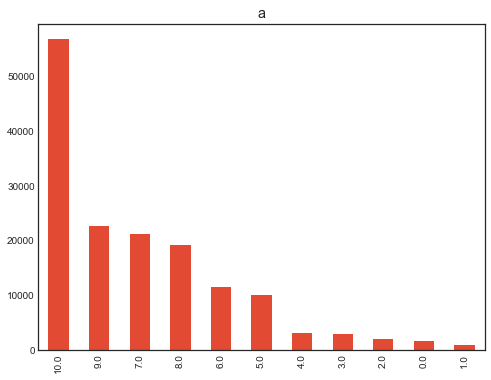

In [215]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
train.score.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"a") # puts a title on our graph
plt.show()

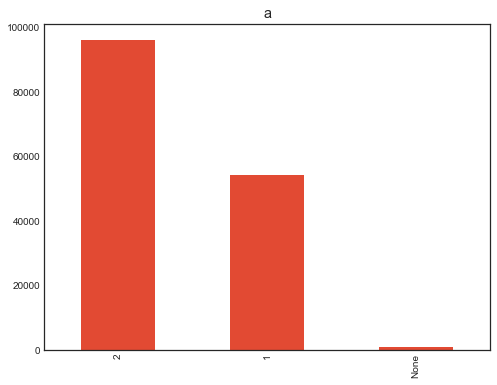

In [216]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
train.sex.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"a") # puts a title on our graph
plt.show()

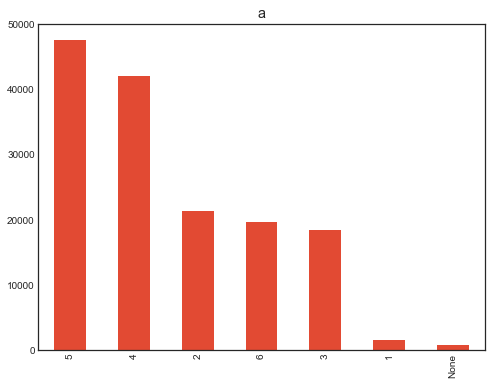

In [217]:

import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
train.age_cat.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"a") # puts a title on our graph
plt.show()

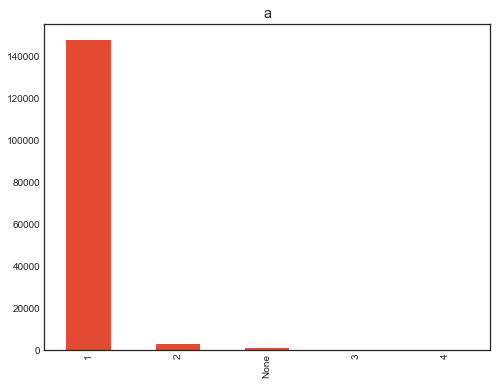

In [218]:

import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
train.lang.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"a") # puts a title on our graph
plt.show()

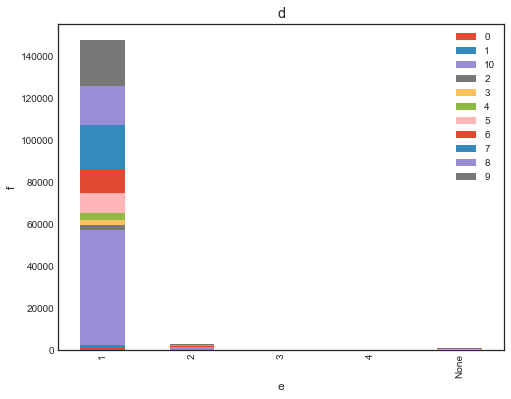

In [219]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train.lang[train.score == 0].value_counts()
Survived_1 = train.lang[train.score == 1].value_counts()
Survived_2 = train.lang[train.score == 2].value_counts()
Survived_3 = train.lang[train.score == 3].value_counts()
Survived_4 = train.lang[train.score == 4].value_counts()
Survived_5 = train.lang[train.score == 5].value_counts()
Survived_6 = train.lang[train.score == 6].value_counts()
Survived_7 = train.lang[train.score == 7].value_counts()
Survived_8 = train.lang[train.score == 8].value_counts()
Survived_9 = train.lang[train.score == 9].value_counts()
Survived_10 = train.lang[train.score == 10].value_counts()

df=pd.DataFrame({u'0':Survived_0, u'1':Survived_1,u'2':Survived_2,
                 u'3':Survived_3,u'4':Survived_4,u'5':Survived_5,u'6':Survived_6,
                u'7':Survived_7,u'8':Survived_8,u'9':Survived_9,u'10':Survived_10})
df.plot(kind='bar', stacked=True)
plt.title(u"d")
plt.xlabel(u"e") 
plt.ylabel(u"f") 

plt.show()

In [220]:
print(train.age_cat.value_counts())
print(880/151824)


5       47678
4       42054
2       21400
6       19749
3       18470
1        1593
None      880
Name: age_cat, dtype: int64
0.005796185056381073


In [221]:
print(train.sex.value_counts())
print(1046/151824)

2       96294
1       54484
None     1046
Name: sex, dtype: int64
0.00688955632838023


In [222]:
print(train.stay_cat.value_counts())
print(82359/151824)

None    82359
2       30688
3       19231
1       11120
4        5487
5        2939
Name: stay_cat, dtype: int64
0.5424636421119191


In [223]:
print(train.lang.value_counts())
print(1028/151824)

1       147799
2         2992
None      1028
3            4
4            1
Name: lang, dtype: int64
0.006770997997681526


In [224]:
print(train.er.value_counts())
print(112972/151824)

None    112972
1        22147
2        16705
Name: er, dtype: int64
0.7440984297607757


In [225]:
print(train.category.value_counts())


overall    21699
room       20031
nurses     19706
physn      16631
meals      15050
issues     13404
disch      13276
admn       12755
tests      10772
visit       8493
Name: category, dtype: int64


In [226]:
print(train.score.value_counts())

10.0    56775
9.0     22652
7.0     21129
8.0     19249
6.0     11588
5.0      9989
4.0      3016
3.0      2878
2.0      2029
0.0      1550
1.0       962
Name: score, dtype: int64


In [227]:
sex = pd.DataFrame()
sex = pd.get_dummies( train.sex , prefix='Sex' )
sex.head()


,Sex_1,Sex_2,Sex_None
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [228]:
sum(sex.Sex_None)

1046

In [229]:
age_cat = pd.get_dummies( train.age_cat , prefix='age_cat' )
age_cat.head()

,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_None
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [230]:
stay_cat = pd.get_dummies( train.stay_cat , prefix='stay_cat' )
stay_cat.head()
stay_cat = stay_cat.iloc[:,0:5]
stay_cat.head()

,stay_cat_1,stay_cat_2,stay_cat_3,stay_cat_4,stay_cat_5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [231]:
lang = pd.get_dummies( train.lang , prefix='lang' )
lang = lang.iloc[:,0:4]
lang.head()

,lang_1,lang_2,lang_3,lang_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [232]:
er = pd.get_dummies( train.er , prefix='er' )
er.head()

,er_1,er_2,er_None
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [233]:
category = pd.get_dummies( train.category , prefix='category' )
category.head()


,category_admn,category_disch,category_issues,category_meals,category_nurses,category_overall,category_physn,category_room,category_tests,category_visit
0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0


In [234]:
child = pd.DataFrame()
survey_number = pd.get_dummies( train.survey_number , prefix='survey_number' )
survey_number.head()

,survey_number_1,survey_number_2,survey_number_6,survey_number_7,survey_number_8,survey_number_9,survey_number_13,survey_number_14,survey_number_15,survey_number_16,...,survey_number_98811,survey_number_98820,survey_number_98824,survey_number_98828,survey_number_98843,survey_number_98844,survey_number_98847,survey_number_98848,survey_number_98849,survey_number_98850
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
survey = pd.DataFrame()

survey ['a1']=train.survey_number.map( lambda s : 1 if s <=10000 else 0 )
survey ['a2']=train.survey_number.map( lambda s : 1 if 10000 < s <= 20000 else 0 )
survey ['a3']=train.survey_number.map( lambda s : 1 if 20000 < s <=30000 else 0 )
survey ['a4']=train.survey_number.map( lambda s : 1 if 30000 < s <=40000 else 0 )
survey ['a5']=train.survey_number.map( lambda s : 1 if 40000 < s <=50000 else 0 )
survey ['a6']=train.survey_number.map( lambda s : 1 if 50000 < s <=60000 else 0 )
survey ['a7']=train.survey_number.map( lambda s : 1 if 60000 < s <=70000 else 0 )
survey ['a8']=train.survey_number.map( lambda s : 1 if 70000 < s <=80000 else 0 )
survey ['a9']=train.survey_number.map( lambda s : 1 if 80000 < s <=90000 else 0 )
survey ['a10']=train.survey_number.map( lambda s : 1 if 90000 < s <=100000 else 0 )
survey.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [315]:
full_X = pd.concat( [  age_cat, sex, stay_cat, lang, category] , axis=1 )
full_X.head()

,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_None,Sex_1,Sex_2,Sex_None,...,category_admn,category_disch,category_issues,category_meals,category_nurses,category_overall,category_physn,category_room,category_tests,category_visit
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [316]:
np.isnan(full_X).any()

age_cat_1           False
age_cat_2           False
age_cat_3           False
age_cat_4           False
age_cat_5           False
age_cat_6           False
age_cat_None        False
Sex_1               False
Sex_2               False
Sex_None            False
stay_cat_1          False
stay_cat_2          False
stay_cat_3          False
stay_cat_4          False
stay_cat_5          False
lang_1              False
lang_2              False
lang_3              False
lang_4              False
category_admn       False
category_disch      False
category_issues     False
category_meals      False
category_nurses     False
category_overall    False
category_physn      False
category_room       False
category_tests      False
category_visit      False
dtype: bool

In [317]:
a=pd.to_numeric(train.score)
a
b=a.fillna(0).astype(int)

In [318]:
from sklearn.cross_validation import train_test_split , StratifiedKFold
train_valid_X = full_X
train_valid_y = b

train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .9 )

print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape )

(151824, 29) (136641, 29) (15183, 29) (136641,) (15183,)


In [319]:

model1 = RandomForestClassifier()


model1.fit( train_X , train_y )
print (model1.score( train_X , train_y ) , model1.score( valid_X , valid_y ))
A=model1.predict(valid_X)
np.sum((A-valid_y)**2)

0.420583865750397 0.4120397813343871


120467

In [320]:
model2 = LogisticRegression()
model2.fit( train_X , train_y )
print (model2.score( train_X , train_y ) , model2.score( valid_X , valid_y ))
B=model2.predict(valid_X)
np.sum((B-valid_y)**2)

0.41545363397516116 0.412500823289205


122790

In [321]:

model3 =DecisionTreeClassifier()
model3.fit( train_X , train_y )
print (model3.score( train_X , train_y ) , model3.score( valid_X , valid_y ))
C=model3.predict(valid_X)
np.sum((C-valid_y)**2)

0.4209351512357199 0.4101956135151156


121279

In [243]:
model4 = ensemble.ExtraTreesClassifier()
model4.fit( train_X , train_y )
print (model4.score( train_X , train_y ) , model4.score( valid_X , valid_y ))
D=model4.predict(valid_X)
np.sum((D-valid_y)**2)

0.445634911922483 0.3868142000922084


120625

In [244]:
import tensorflow as tf

In [245]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [246]:
test = pd.read_csv("/Users/wutong/Desktop/test_data.csv",encoding="ISO-8859-1")
test= test.iloc[:,0:9]
test.head()

,id,survey_number,age_cat,sex,stay_cat,lang,er,comment,category
0,5010,3,3,2,None,1,None,I waited a long time to be taken into surgery....,tests
1,5388,4,5,2,None,1,None,When surgery is over after 11 p.m. Tuesday - t...,disch
2,5389,4,5,2,None,1,None,Rate everything except H at 5 or better.,overall
3,5710,5,2,2,2,1,None,X and X were the most memorable but overall ev...,nurses
4,5711,5,2,2,2,1,None,Admissions was smooth everybody was very frien...,admn


In [247]:
full = train.append( test , ignore_index = True )
aa = full[ :151824 ]
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151824 entries, 0 to 151823
Data columns (total 10 columns):
age_cat          151824 non-null object
category         151817 non-null object
comment          151824 non-null object
er               151824 non-null object
id               151824 non-null int64
lang             151824 non-null object
score            151817 non-null float64
sex              151824 non-null object
stay_cat         151824 non-null object
survey_number    151824 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 11.6+ MB


In [248]:
sex1 = pd.DataFrame()
sex1 = pd.get_dummies( full.sex , prefix='Sex' )
sex1= sex1
sex1.head()

,Sex_1,Sex_2,Sex_None
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [249]:
full.age_cat[170000]

'4'

In [250]:
age_cat1 = pd.get_dummies(full.age_cat , prefix='age_cat' )
age_cat1.head()

,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_None
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [251]:
stay_cat1 = pd.get_dummies( full.stay_cat , prefix='stay_cat' )
stay_cat1.head()


,stay_cat_1,stay_cat_2,stay_cat_3,stay_cat_4,stay_cat_5,stay_cat_None
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [252]:
lang1 = pd.get_dummies( full.lang , prefix='lang' )
lang1 = lang1.iloc[:,0:3]
lang1.head()

,lang_1,lang_2,lang_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [253]:
er1 = pd.get_dummies( full.er , prefix='er' )
er1.head()

,er_1,er_2,er_None
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [291]:
survey1 = pd.DataFrame()

survey1 ['a1']=full.survey_number.map( lambda s : 1 if s <=10000 else 0 )
survey1 ['a2']=full.survey_number.map( lambda s : 1 if 10000 < s <= 20000 else 0 )
survey1 ['a3']=full.survey_number.map( lambda s : 1 if 20000 < s <=30000 else 0 )
survey1 ['a4']=full.survey_number.map( lambda s : 1 if 30000 < s <=40000 else 0 )
survey1 ['a5']=full.survey_number.map( lambda s : 1 if 40000 < s <=50000 else 0 )
survey1 ['a6']=full.survey_number.map( lambda s : 1 if 50000 < s <=60000 else 0 )
survey1 ['a7']=full.survey_number.map( lambda s : 1 if 60000 < s <=70000 else 0 )
survey1 ['a8']=full.survey_number.map( lambda s : 1 if 70000 < s <=80000 else 0 )
survey1 ['a9']=full.survey_number.map( lambda s : 1 if 80000 < s <=90000 else 0 )
survey1 ['a10']=full.survey_number.map( lambda s : 1 if 90000 < s <=100000 else 0 )
survey1.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [292]:
category1 = pd.get_dummies( full.category , prefix='category' )
category1.head()

,category_admn,category_disch,category_issues,category_meals,category_nurses,category_overall,category_physn,category_room,category_tests,category_visit
0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0


In [322]:
full_X1 = pd.concat( [ age_cat1, sex1, stay_cat1, lang1, category1] , axis=1 )
full_X1.head()

,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_None,Sex_1,Sex_2,Sex_None,...,category_admn,category_disch,category_issues,category_meals,category_nurses,category_overall,category_physn,category_room,category_tests,category_visit
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [323]:
a1=pd.to_numeric(full.score)
a1
b1=a1.fillna(0).astype(int)

In [324]:
train_valid_X1 = full_X1
train_valid_y1 = b1
test_X1 = full_X1[ 151825: ]

train_X1 , valid_X1 , train_y1 , valid_y1 = train_test_split( train_valid_X1 , train_valid_y1 , train_size = .9 )

print (full_X1.shape , train_X1.shape , valid_X1.shape , train_y1.shape , valid_y1.shape,test_X1.shape )
#age_cat, sex, stay_cat, lang, category

(178778, 29) (160900, 29) (17878, 29) (160900,) (17878,) (26953, 29)


In [325]:

modela = RandomForestClassifier()
modela.fit( train_X1 , train_y1 )
print (modela.score( train_X1 , train_y1 ) , modela.score( valid_X1 , valid_y1 ))
A=modela.predict(valid_X1)
np.sum((A-valid_y1)**2)





0.35826600372902423 0.3477458328672111


385224

In [310]:
modelb = LogisticRegression()
modelb.fit( train_X1 , train_y1 )
print (modelb.score( train_X1 , train_y1 ) , modelb.score( valid_X1 , valid_y1 ))
A=modelb.predict(valid_X1)
np.sum((A-valid_y1)**2)




0.3522374145431945 0.3554088824253272


381947

In [311]:

modelc =DecisionTreeClassifier()
modelc.fit( train_X1 , train_y1 )
print (modelc.score( train_X1 , train_y1 ) , modelc.score( valid_X1 , valid_y1 ))
C=modelc.predict(valid_X1)
np.sum((C-valid_y1)**2)

0.3584897451833437 0.3496476115896633


383678

In [326]:
A1=model1.predict(test_X1)
B1=model2.predict(test_X1)
C1=model3.predict(test_X1)

model11 = VotingClassifier(estimators = 
                        [('gbsdm', modela),
                     ('rfasdd', modelb),('rsadaf', modelc)], voting='hard',weights=[1,1,1])

model11.fit(train_X1 , train_y1)
F=model11.predict( test_X1 )
F


array([10,  9, 10, ..., 10, 10, 10])

In [335]:
G=(F+7.6)/2
np.round(G)

array([9., 8., 9., ..., 9., 9., 9.])

In [336]:

test1 = pd.DataFrame(G)
test1.to_csv( "/Users/wutong/Desktop/CNN4.csv" , index = False )

